In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install tensorflow keras-preprocessing scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.9 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]
train_path = "/content/drive/MyDrive/Colab Notebooks/train"
valid_path = "/content/drive/MyDrive/Colab Notebooks/test"

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights="imagenet", include_top=False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
folders = glob("/content/drive/MyDrive/Colab Notebooks/train/*")

In [ ]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation="softmax")(x)

In [ ]:
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

test_set = test_datagen.flow_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/test",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

Found 5252 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
class LossHistory(tf.keras.callbacks.Callback):
    def __init__(self):
        super().__init__()
        self.train_losses = []
        self.val_losses = []
        self.train_accuracies = []
        self.val_accuracies = []

    def on_epoch_end(self, epoch, logs=None):
        self.train_losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.train_accuracies.append(logs.get('accuracy'))
        self.val_accuracies.append(logs.get('val_accuracy'))

In [ ]:
loss_history = LossHistory()

In [ ]:
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set),
    callbacks=[loss_history]
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


165/165 ━━━━━━━━━━━━━━━━━━━━ 3984s 24s/step - accuracy: 0.8618 - loss: 0.3499 - val_accuracy: 0.8750 - val_loss: 0.3892
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


165/165 ━━━━━━━━━━━━━━━━━━━━ 40s 241ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 3773s 23s/step - accuracy: 0.9536 - loss: 0.1187 - val_accuracy: 0.8061 - val_loss: 0.6615
Epoch 4/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 3904s 23s/step - accuracy: 0.9650 - loss: 0.0916 - val_accuracy: 0.8926 - val_loss: 0.3737
Epoch 6/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 3929s 24s/step - accuracy: 0.9618 - loss: 0.1036 - val_accuracy: 0.9119 - val_loss: 0.3175
Epoch 8/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 3912s 24s/step - accuracy: 0.9641 - loss: 0.0974 - val_accuracy: 0.9311 - val_loss: 0.2417
Epoch 10/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


In [ ]:
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

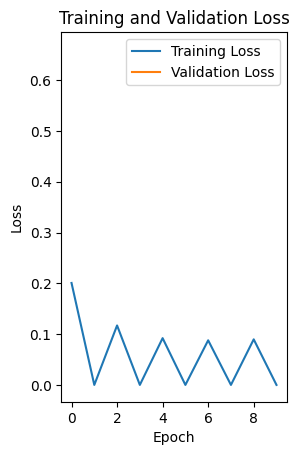

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(loss_history.train_losses, label='Training Loss')
plt.plot(loss_history.val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(loss_history.train_accuracies, label='Training Accuracy')
plt.plot(loss_history.val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.savefig('training_metrics.png')
plt.close()

In [ ]:
def get_predictions_and_true_labels(model, test_generator):
    test_generator.reset()
    pred = model.predict(test_generator, steps=len(test_generator), verbose=1)
    predicted_classes = np.argmax(pred, axis=1)
    true_classes = test_generator.classes

    return predicted_classes, true_classes

In [ ]:
y_pred, y_true = get_predictions_and_true_labels(model, test_set)

20/20 ━━━━━━━━━━━━━━━━━━━━ 406s 20s/step


In [ ]:
class_labels = list(test_set.class_indices.keys())
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))


Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.40      0.35      0.37       234
   PNEUMONIA       0.64      0.68      0.66       390

    accuracy                           0.56       624
   macro avg       0.52      0.52      0.52       624
weighted avg       0.55      0.56      0.55       624



In [ ]:
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[ 82 152]
 [123 267]]


([<matplotlib.axis.YTick at 0x7e26b899a020>,
 [Text(0, 0, 'NORMAL'), Text(0, 1, 'PNEUMONIA')])

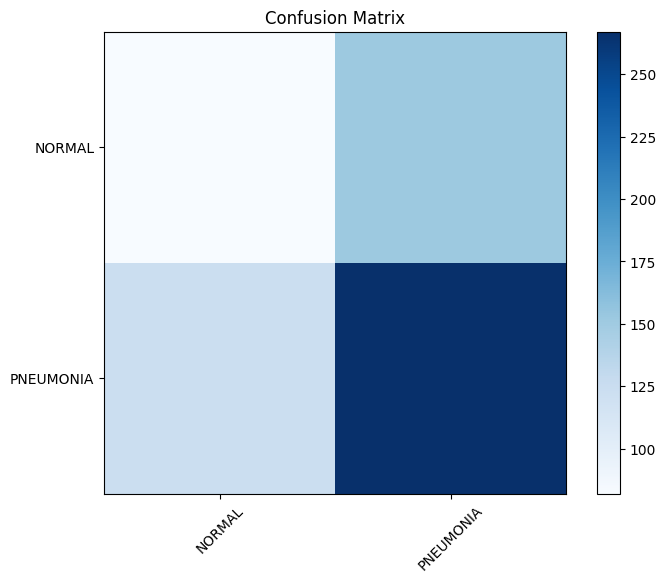

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

In [ ]:
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('confusion_matrix.png')
plt.close()

In [ ]:
accuracy = accuracy_score(y_true, y_pred)
print(f"\nOverall Accuracy: {accuracy * 100:.2f}%")


Overall Accuracy: 55.93%


In [ ]:
model.save("vgg16_pneumonia_model.h5")